In [ ]:
"""
    This notebook analyses seven storm event data. 
    
    contact
    ----------
    KENNETH O. EKPETERE | kennethekpetere@ku.edu |kenneth.ekpetere@gmail.com
    JUDE H. KASTENS | jkastens@ku.edu 

    """

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **(1) Hail**

# **Level-2 Summarize by unique event**

In [2]:
# Function that summerizes the event data records by county name and date, returns frequency count for each unique combination

def county_date_sort(input_file, output_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file, low_memory=False)
    
    # Convert numeric columns to numeric type
    numeric_columns = ['magnitude', 'sum_damage', 'prop_damage', 'crop_damage', 'sum_injury']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Group by "county_name" and "date" and calculate the maximum magnitude,
    # sum of damage, sum of injury, and frequency count for each unique combination
    summary_df = df.groupby(['county_name', 'date']).agg({
        'magnitude': 'max',
        'sum_damage': 'sum',
        'prop_damage': 'sum',
        'crop_damage': 'sum',
        'sum_injury': 'sum'
    }).reset_index()
    
    # Calculate the frequency count of each unique combination
    summary_df['frequency_sort'] = df.groupby(['county_name', 'date']).size().reset_index(name='frequency_count')['frequency_count']
    
    # Write the summary DataFrame to a new CSV file
    summary_df.to_csv(output_file, index=False)

# Process Output File
input_file = 'hail_county_date_1950_2023.csv'
output_file = 'hail_county_date_sortL1.csv'
county_date_sort(input_file, output_file)

# **Level-3 Summarize by unique county**

In [3]:
# (B) Summarize level-2 data

def advance_summary1(input_file, output_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file)
    
    # Convert numeric columns to numeric type
    numeric_columns = ['magnitude', 'sum_damage', 'prop_damage', 'crop_damage', 'sum_injury']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Sort the DataFrame by "county_name" in ascending order
    df = df.sort_values('county_name')
    
    # Group by "county_name" and calculate the average magnitude,
    # maximum magnitude, sum of damages, and frequency count for each unique county
    summary_df = df.groupby('county_name').agg({
        'magnitude': ['mean', 'max'],
        'sum_damage': 'sum',
        'prop_damage': 'sum',
        'crop_damage': 'sum',
        'sum_injury': 'sum'
    })
    
    # Flatten the column names and reset the index
    summary_df.columns = [f'{col[0]}_{col[1]}' for col in summary_df.columns]
    summary_df = summary_df.round(3).reset_index()
    
    # Add the frequency count columns
    summary_df['freq_count'] = summary_df['county_name'].map(df['county_name'].value_counts())
    summary_df['freq1p5'] = summary_df['county_name'].map(df.loc[df['magnitude'] >= 1.5, 'county_name'].value_counts())
    summary_df['freq3'] = summary_df['county_name'].map(df.loc[df['magnitude'] >= 3, 'county_name'].value_counts())
    
    # Fill any missing frequency count values with 0
    summary_df[['freq_count', 'freq1p5', 'freq3']] = summary_df[['freq_count', 'freq1p5', 'freq3']].fillna(0).astype(int)
    
    # Write the summary DataFrame to a new CSV file
    summary_df.to_csv(output_file, index=False)

# Write Output
input_file = 'hail_county_date_sortL1.csv'
output_file = 'hail_county_sortL2.csv'
advance_summary1(input_file, output_file)

# **Level-4 Summarize by Year**

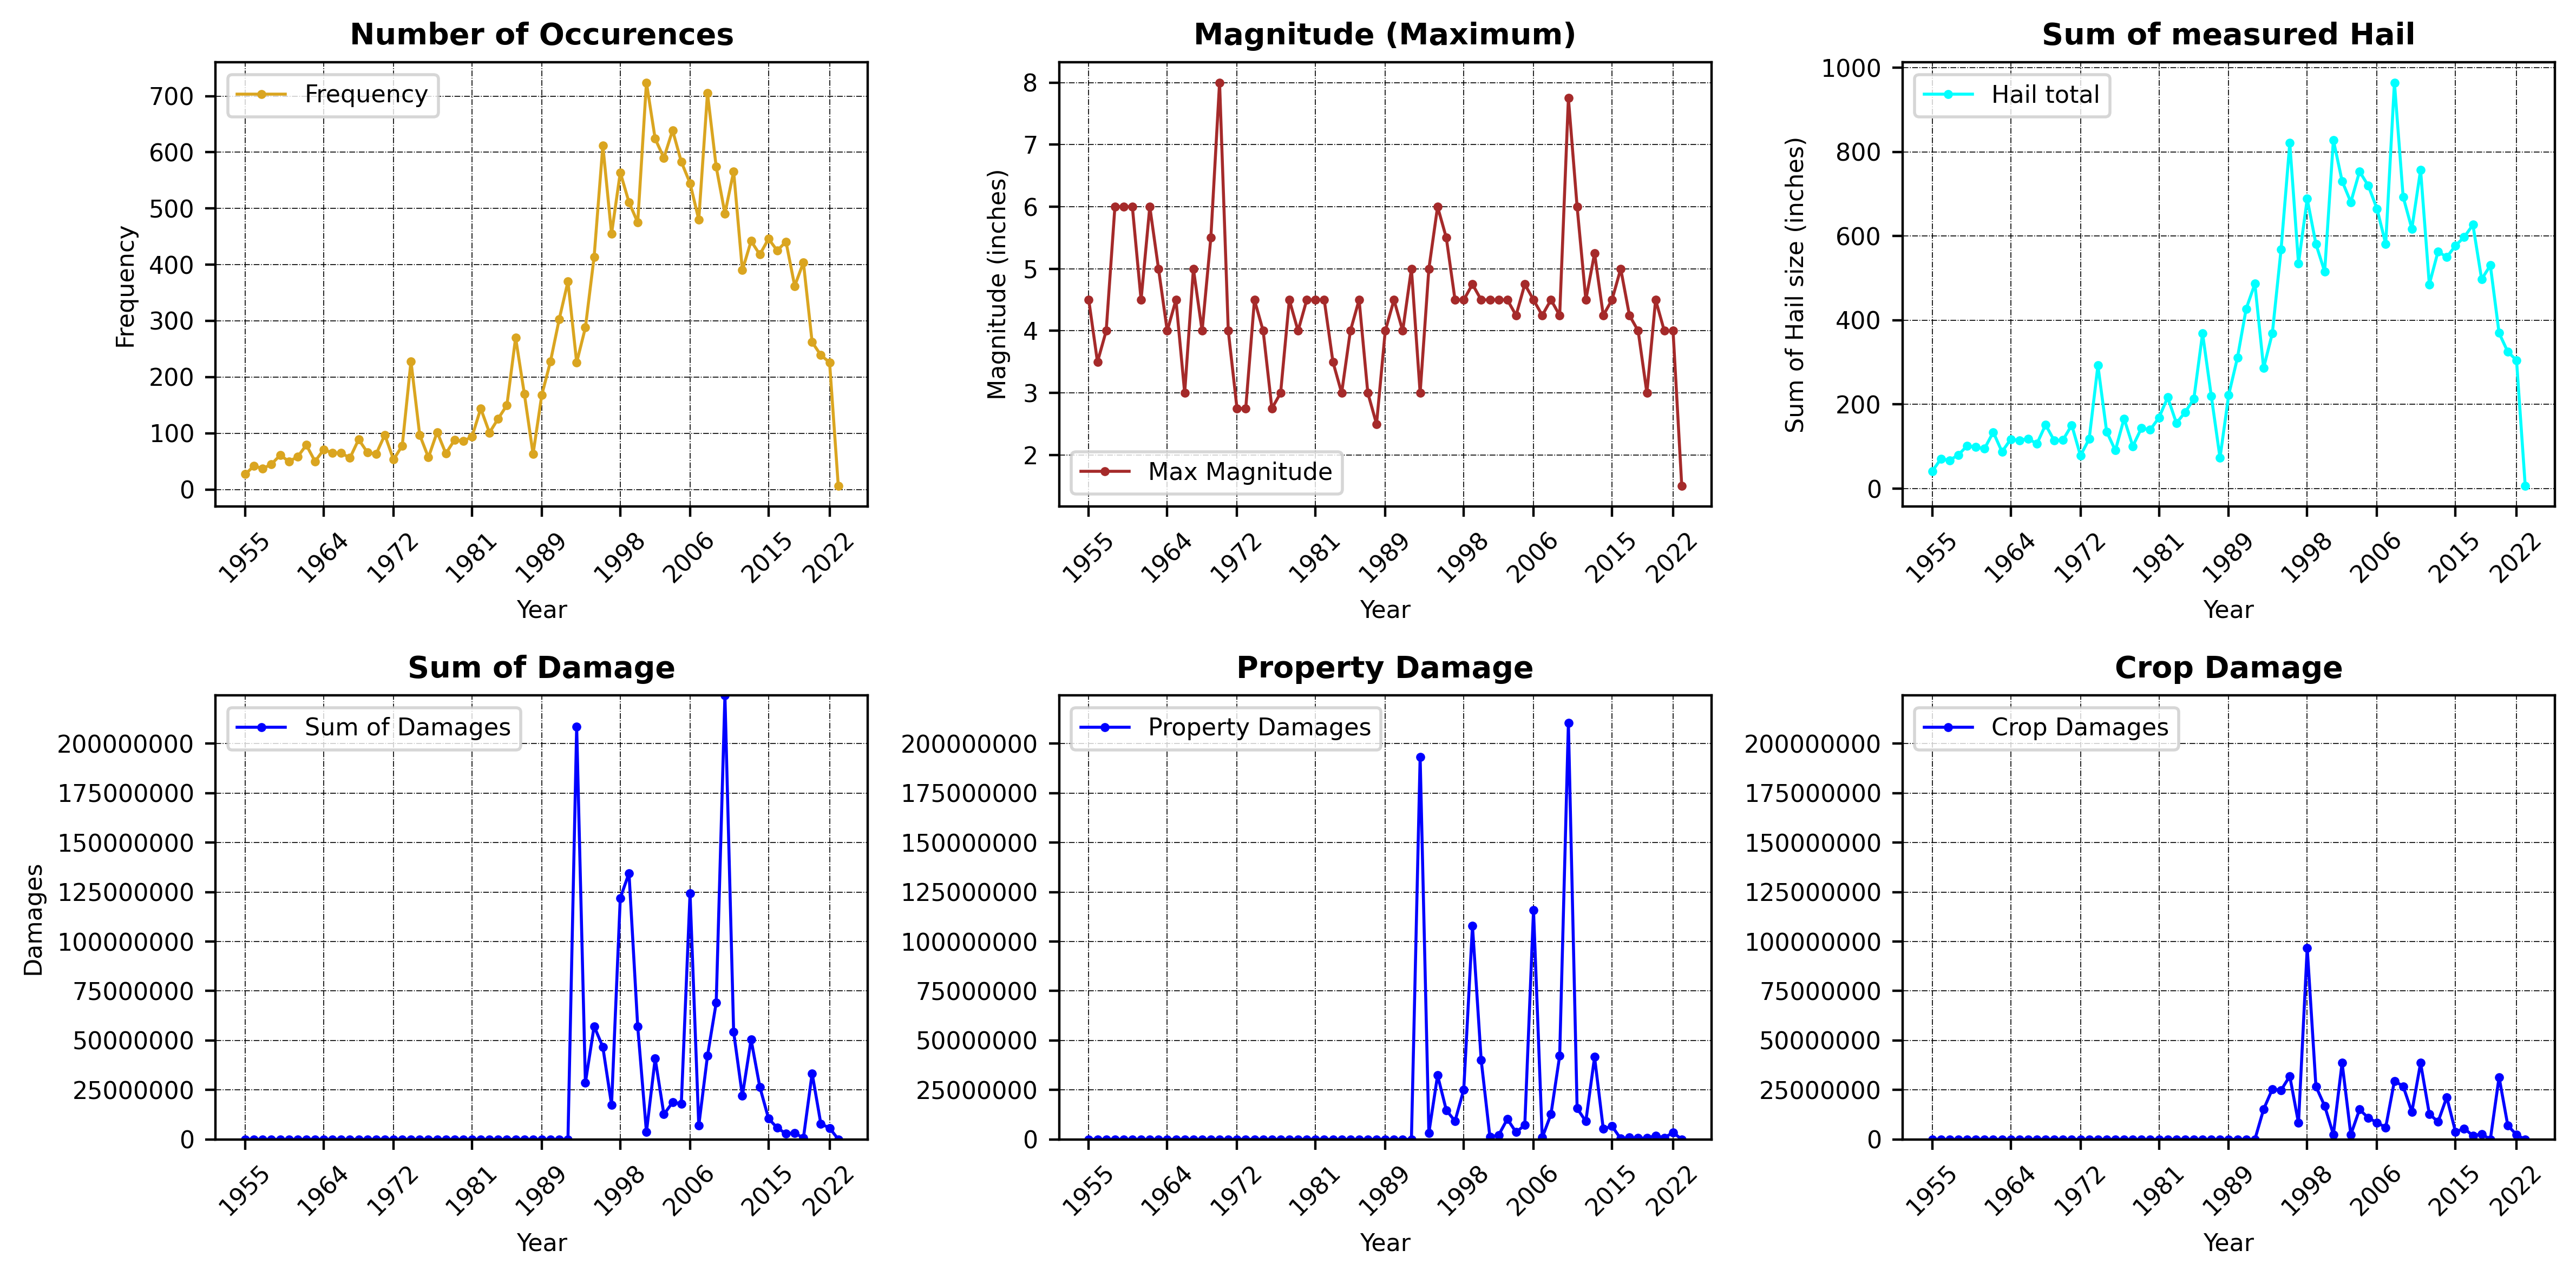

In [33]:
# Function to Process Data by Year and plot
def summaryByYearHail(input_file, output_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(input_file, low_memory=True)

    # Convert numeric columns to appropriate data types
    numeric_columns = ['Year', 'sum_damage', 'prop_damage', 'crop_damage', 'magnitude', 'sum_injury']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

    # Calculate frequency count of unique "Year" values and store it in a new column "Freq_count"
    df['Freq_count'] = df['Year'].map(df['Year'].value_counts())
    
    # Calculate the frequency count of each unique Year
    FreqYear = df.groupby(['Year']).size().reset_index(name='Freq_count')['Freq_count']
    YearStamp = df.groupby('Year')['Year'].first().values
    
    # print(FreqYear.index)
    # print(YearStamp)
    
    # Calculate additional output fields
    sum_damageB = df.groupby('Year')['sum_damage'].sum()
    prop_damageB = df.groupby('Year')['prop_damage'].sum()
    crop_damageB = df.groupby('Year')['crop_damage'].sum()
    magnitude_sumB = df.groupby('Year')['magnitude'].sum()
    magnitude_maxB = df.groupby('Year')['magnitude'].max()
    sum_injuryB = df.groupby('Year')['sum_injury'].sum()
    
    yMax = np.max(sum_damageB) #+ 2500000
    yMin = np.min(sum_damageB) #+ 2500000
    # print("Max", yMax)
    # print("Min", yMin)
    
    

    # Plot each output column against the unique "Year" values
    plt.figure(figsize=(12, 6), dpi=400)
    my_xticks = range(1955, 2023, 1)     
    
    plt.subplot(2, 3, 1)
    # plt.plot(FreqYear.index, FreqYear.values, color='blue', marker = '.', markersize=0.5, linewidth=0.5, label = "Frequency")
    plt.plot(YearStamp, FreqYear.values, color='goldenrod', marker = '.', markersize=4, linewidth=1, label = "Frequency")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Frequency', fontweight='light', fontsize=8)
    plt.title('Number of Occurences', fontweight='bold', fontsize=10)
    plt.legend(loc=2, fontsize=8)
    # plt.xticks([my_xticks[0],  my_xticks[-1]],  visible=True, rotation=45, fontsize=6)      # plt.xticks(range(1955, 2023, 1), rotation=45, fontsize=6)
    plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
                my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    plt.tick_params(axis='both', which='major', labelsize=8)
    # Customize the major grid
    # plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    
    
    
    plt.subplot(2, 3, 2)
    # plt.bar(magnitude_maxB.index, magnitude_maxB.values)
    plt.plot(YearStamp, magnitude_maxB.values, color='brown', marker = '.', markersize=4, linewidth=1, label = "Max Magnitude")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Magnitude (inches)', fontweight='light', fontsize=8)
    plt.title('Magnitude (Maximum)', fontweight='bold', fontsize=10)
    plt.legend(loc=3, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
                my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    plt.tick_params(axis='both', which='major', labelsize=8)
    # plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    
    
    plt.subplot(2, 3, 3)
    # plt.bar(magnitude_sumB.index, magnitude_sumB.values)
    plt.plot(YearStamp, magnitude_sumB.values, color='cyan', marker = '.', markersize=4, linewidth=1, label = "Hail total")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Sum of Hail size (inches)', fontweight='light', fontsize=8)
    plt.title('Sum of measured Hail', fontweight='bold', fontsize=10)
    plt.legend(loc=2, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
                my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    plt.tick_params(axis='both', which='major', labelsize=8)
    # plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    

    plt.subplot(2, 3, 4)
    # plt.bar(sum_damageB.index, sum_damageB.values)
    plt.plot(YearStamp, sum_damageB.values, color='blue', marker = '.', markersize=4, linewidth=1, label = "Sum of Damages")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Damages', fontweight='light', fontsize=8)
    plt.ylim((yMin,yMax))
    plt.title('Sum of Damage', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=2, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
                my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    plt.tick_params(axis='both', which='major', labelsize=8)
    # plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    

    plt.subplot(2, 3, 5)
    # plt.bar(prop_damageB.index, prop_damageB.values)
    plt.plot(YearStamp, prop_damageB.values, color='blue', marker = '.', markersize=4, linewidth=1, label = "Property Damages")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    # plt.ylabel('Damages (in U.S. Dollars)', fontweight='light', fontsize=8)
    plt.ylim((yMin,yMax))
    plt.title('Property Damage', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=2, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
                my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    # plt.yticks([])
    plt.tick_params(axis='both', which='major', labelsize=8)
    # plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    

    plt.subplot(2, 3, 6)
    # plt.bar(crop_damageB.index, crop_damageB.values)
    plt.plot(YearStamp, crop_damageB.values, color='blue', marker = '.', markersize=4, linewidth=1, label = "Crop Damages")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    # plt.ylabel('Damages (in U.S. Dollars)', fontweight='light', fontsize=8)
    plt.ylim((yMin,yMax))
    plt.title('Crop Damage', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=2, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
                my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    # plt.yticks([])
    plt.tick_params(axis='both', which='major', labelsize=8)
    # plt.grid(linestyle='-', linewidth='0.1', color='black')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    # plt.grid(which='minor', linestyle='dashed', linewidth='0.1', color='black')


    
    

    plt.tight_layout()
    # plt.savefig("Plots/Hail.png")
    plt.show()
    

    # Create a new DataFrame for the additional output fields
    output_df = pd.DataFrame({
        'Year': YearStamp,
        'Freq_count': FreqYear.values,
        'sum_damageB': sum_damageB.values,
        'prop_damageB': prop_damageB.values,
        'crop_damageB': crop_damageB.values,
        'magnitude_sumB': magnitude_sumB.values,
        'magnitude_maxB': magnitude_maxB.values,
        'sum_injuryB': sum_injuryB.values
    })

    # Save the output DataFrame to a new CSV file
    output_df.to_csv(output_file, index=False)

    # Return the DataFrame with the new columns
    return df

# Process files:
input_file = 'hail_county_date_sorted.csv'  # Input files
output_file = 'hail_data_ByYear.csv'  # Output file
result_df = summaryByYearHail(input_file, output_file)

# **(2) Wind**

# **Level-2 Summarize by unique event**

In [2]:
# Function that summerizes the event data records by county name and date, returns frequency count for each unique combination

def county_date_sort3(input_file, output_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file, low_memory=False)
    
    # Convert numeric columns to numeric type
    numeric_columns = ['magnitude', 'sum_damage', 'prop_damage', 'crop_damage', 'injury', 'death']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Group by "county_name" and "date" and calculate the maximum magnitude,
    # sum of damage, sum of injury, and frequency count for each unique combination
    summary_df = df.groupby(['county_name', 'date']).agg({
        'magnitude': 'max',
        'death': 'sum',
        'sum_damage': 'sum',
        'prop_damage': 'sum',
        'crop_damage': 'sum',
        'injury': 'sum'
    }).reset_index()
    
    # Calculate the frequency count of each unique combination
    summary_df['frequency_sort'] = df.groupby(['county_name', 'date']).size().reset_index(name='frequency_count')['frequency_count']
    
    # Write the summary DataFrame to a new CSV file
    summary_df.to_csv(output_file, index=False)

# Process Output File
input_file = 'wind_county_date_1950_2023.csv'
output_file = 'wind_county_date_sortL1.csv'
county_date_sort3(input_file, output_file)

# **Level-3 Summarize by unique county**

In [3]:
# (B) Summarize level-2 data

def advance_summary4(input_file, output_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file)
    
    # Convert numeric columns to numeric type
    numeric_columns = ['magnitude', 'sum_damage', 'prop_damage', 'crop_damage', 'injury']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Sort the DataFrame by "county_name" in ascending order
    df = df.sort_values('county_name')
    
    # Group by "county_name" and calculate the average magnitude,
    # maximum magnitude, sum of damages, and frequency count for each unique county
    summary_df = df.groupby('county_name').agg({
        'magnitude': ['mean', 'max'],
        'sum_damage': 'sum',
        'prop_damage': 'sum',
        'crop_damage': 'sum',
        'injury': 'sum'
    })
    
    # Flatten the column names and reset the index
    summary_df.columns = [f'{col[0]}_{col[1]}' for col in summary_df.columns]
    summary_df = summary_df.round(3).reset_index()
    
    # Add the frequency count columns
    summary_df['freq_count'] = summary_df['county_name'].map(df['county_name'].value_counts())
    summary_df['freq40'] = summary_df['county_name'].map(df.loc[df['magnitude'] >= 40, 'county_name'].value_counts())
    summary_df['freq60'] = summary_df['county_name'].map(df.loc[df['magnitude'] >= 60, 'county_name'].value_counts())
    summary_df['freq80'] = summary_df['county_name'].map(df.loc[df['magnitude'] >= 80, 'county_name'].value_counts())
    
    # Fill any missing frequency count values with 0
    summary_df[['freq_count', 'freq40', 'freq60', 'freq80']] = summary_df[['freq_count', 'freq40', 'freq60', 'freq80']].fillna(0).astype(int)
    
    # Write the summary DataFrame to a new CSV file
    summary_df.to_csv(output_file, index=False)

# Write Output
input_file = 'wind_county_date_sortL1.csv'
output_file = 'wind_county_sortL2.csv'
advance_summary4(input_file, output_file)

# **Level-4 Summarize by year**

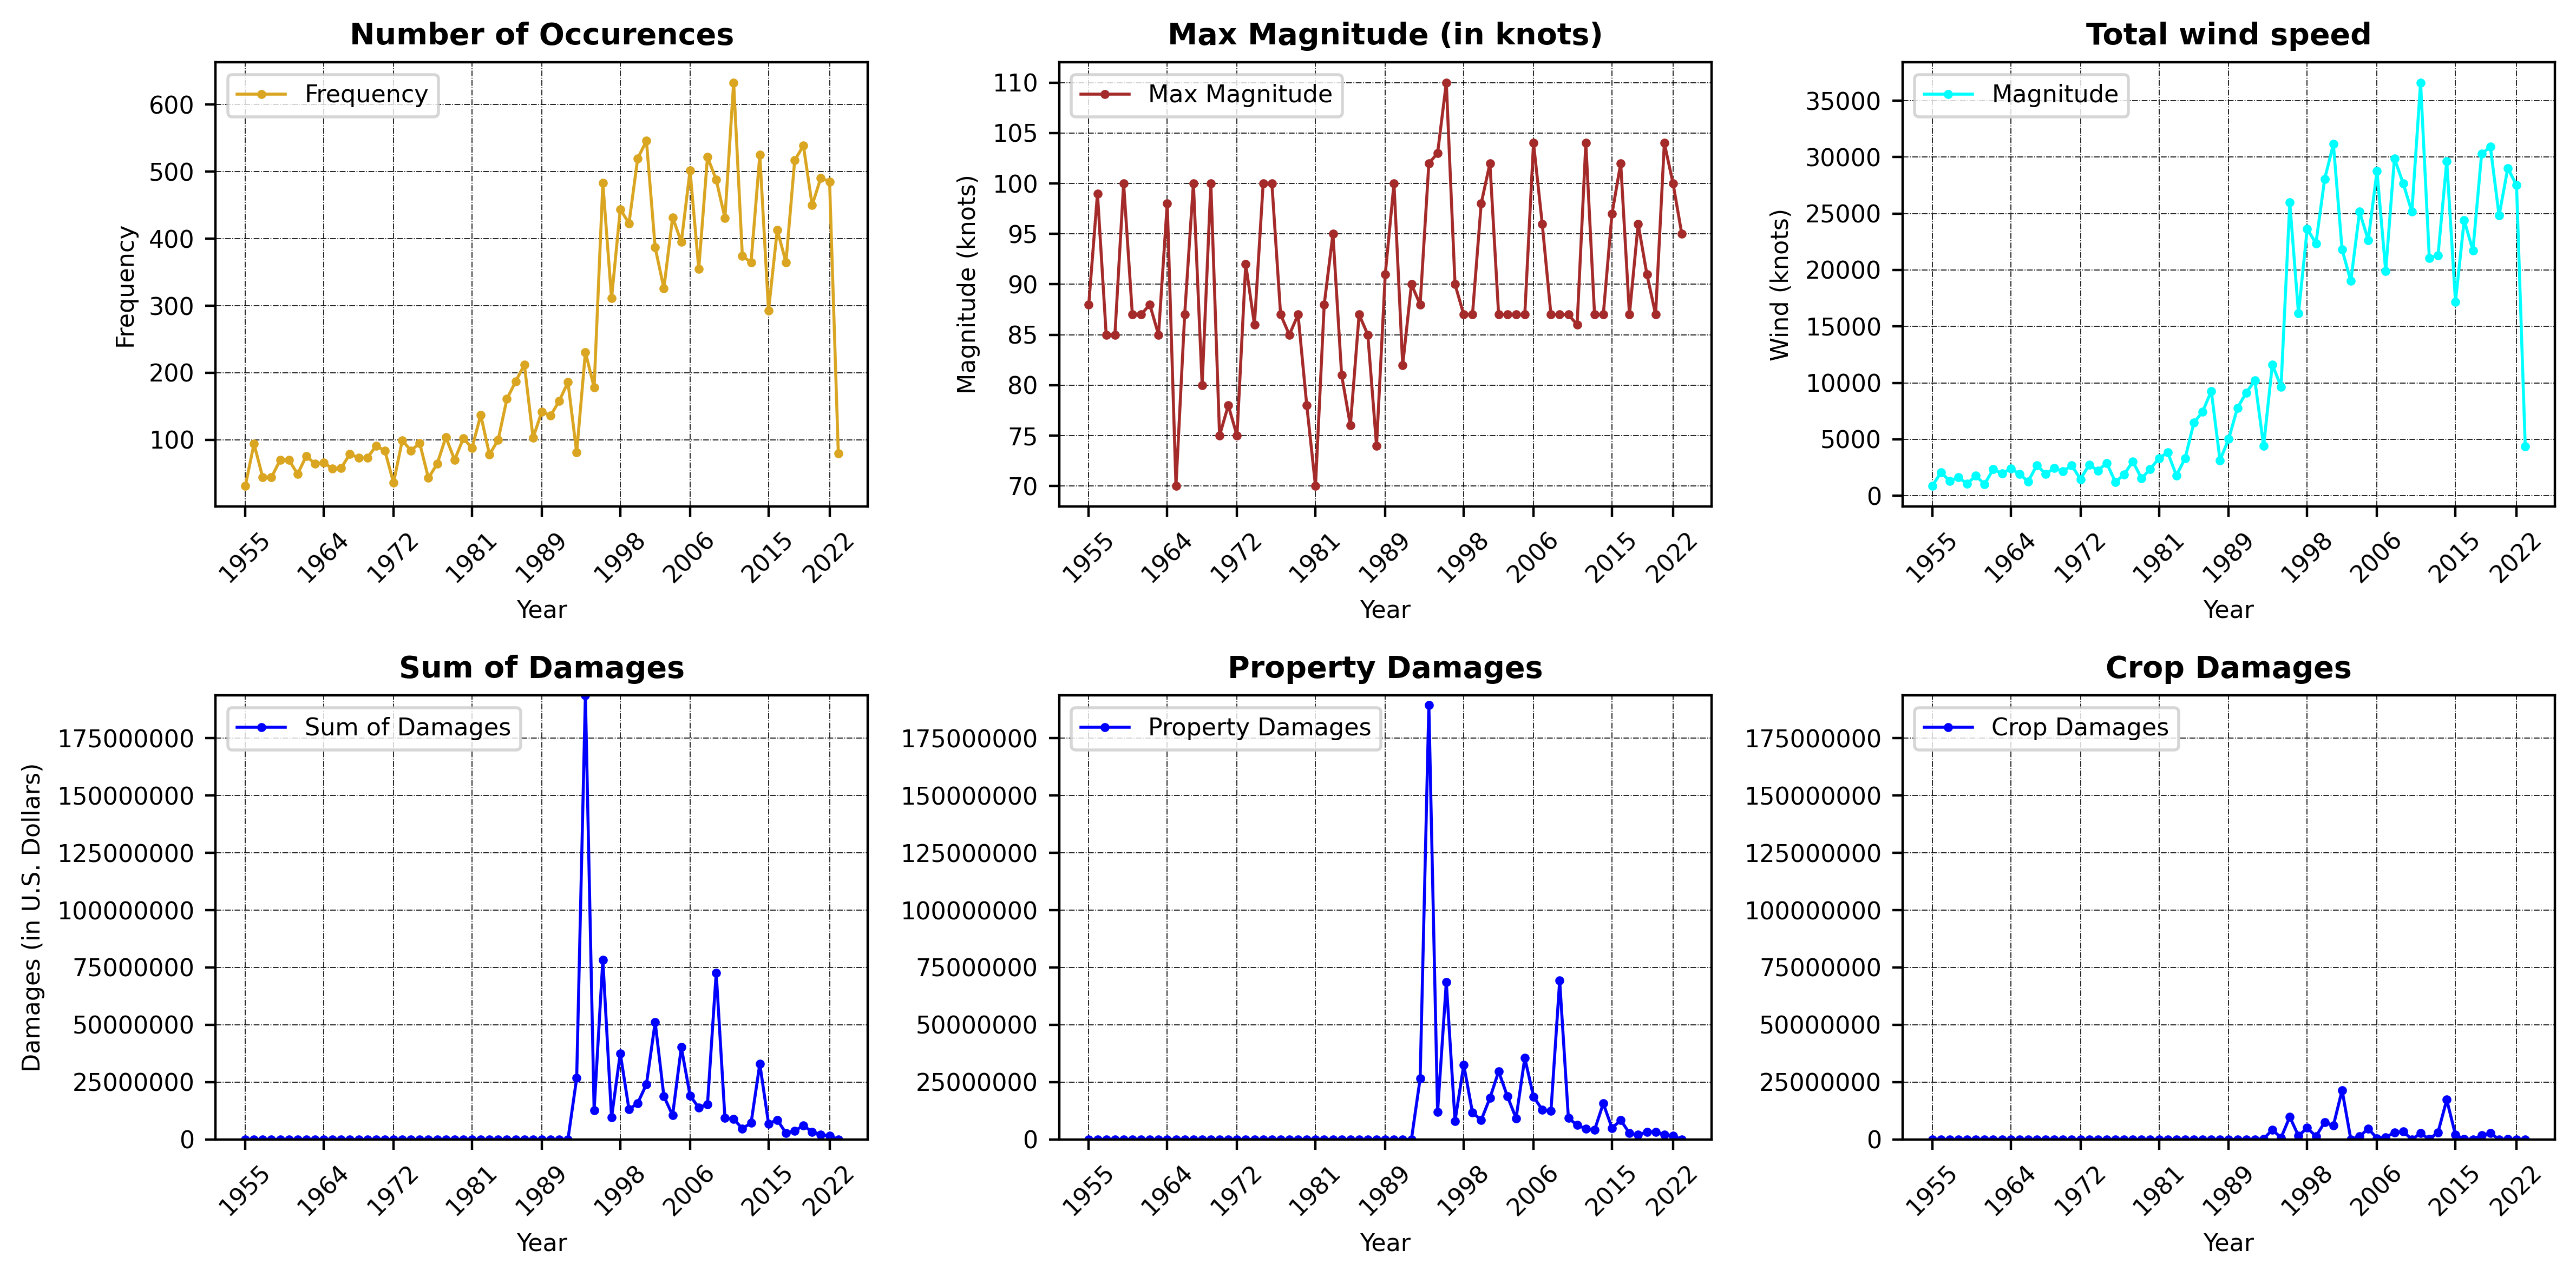

In [36]:
# Function to Process Data by Year and plot
def summaryByYearWind(input_file, output_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(input_file, low_memory=True)

    # Convert numeric columns to appropriate data types
    numeric_columns = ['Year', 'sum_damage', 'prop_damage', 'crop_damage', 'magnitude', 'sum_injury', 'death']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

    # Calculate frequency count of unique "Year" values and store it in a new column "Freq_count"
    df['Freq_count'] = df['Year'].map(df['Year'].value_counts())
    
    # Calculate the frequency count of each unique Year
    FreqYear = df.groupby(['Year']).size().reset_index(name='Freq_count')['Freq_count']
    YearStamp = df.groupby('Year')['Year'].first().values
    
    # print(FreqYear.index)
    # print(YearStamp)
    
    # Calculate additional output fields
    sum_damageB = df.groupby('Year')['sum_damage'].sum()
    prop_damageB = df.groupby('Year')['prop_damage'].sum()
    crop_damageB = df.groupby('Year')['crop_damage'].sum()
    magnitude_sumB = df.groupby('Year')['magnitude'].sum()
    magnitude_maxB = df.groupby('Year')['magnitude'].max()
    sum_injuryB = df.groupby('Year')['sum_injury'].sum()
    deathB = df.groupby('Year')['death'].sum()
    
    yMax = np.max(sum_damageB) #+ 2500000
    yMin = np.min(sum_damageB) #+ 2500000
    # print("Max", yMax)
    # print("Min", yMin)
    
    

    # Plot each output column against the unique "Year" values
    plt.figure(figsize=(12, 6), dpi=400)
    my_xticks = range(1955, 2023, 1)     
    
    plt.subplot(2, 3, 1)
    # plt.plot(FreqYear.index, FreqYear.values, color='blue', marker = '.', markersize=0.5, linewidth=0.5, label = "Frequency")
    plt.plot(YearStamp, FreqYear.values, color='goldenrod', marker = '.', markersize=4, linewidth=1, label = "Frequency")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Frequency', fontweight='light', fontsize=8)
    plt.title('Number of Occurences', fontweight='bold', fontsize=10)
    plt.legend(loc=2, fontsize=8)
    # plt.xticks([my_xticks[0],  my_xticks[-1]],  visible=True, rotation=45, fontsize=6)      # plt.xticks(range(1955, 2023, 1), rotation=45, fontsize=6)
    plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
                my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    
    
    
    plt.subplot(2, 3, 2)
    # plt.bar(magnitude_maxB.index, magnitude_maxB.values)
    plt.plot(YearStamp, magnitude_maxB.values, color='brown', marker = '.', markersize=4, linewidth=1, label = "Max Magnitude")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Magnitude (knots)', fontweight='light', fontsize=8)
    plt.title('Max Magnitude (in knots)', fontweight='bold', fontsize=10)
    plt.legend(loc=2, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
                my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    
    
    plt.subplot(2, 3, 3)
    # plt.bar(magnitude_sumB.index, magnitude_sumB.values)
    plt.plot(YearStamp, magnitude_sumB.values, color='cyan', marker = '.', markersize=4, linewidth=1, label = "Magnitude")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Wind (knots)', fontweight='light', fontsize=8)
    plt.title('Total wind speed', fontweight='bold', fontsize=10)
    plt.legend(loc=2, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
                my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    

    plt.subplot(2, 3, 4)
    # plt.bar(sum_damageB.index, sum_damageB.values)
    plt.plot(YearStamp, sum_damageB.values, color='blue', marker = '.', markersize=4, linewidth=1, label = "Sum of Damages")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Damages (in U.S. Dollars)', fontweight='light', fontsize=8)
    plt.ylim((yMin,yMax))
    plt.title('Sum of Damages', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=2, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
                my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    

    plt.subplot(2, 3, 5)
    # plt.bar(prop_damageB.index, prop_damageB.values)
    plt.plot(YearStamp, prop_damageB.values, color='blue', marker = '.', markersize=4, linewidth=1, label = "Property Damages")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    # plt.ylabel('Damages (in U.S. Dollars)', fontweight='light', fontsize=8)
    plt.ylim((yMin,yMax))
    plt.title('Property Damages', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=2, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
                my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    # plt.yticks([])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    

    plt.subplot(2, 3, 6)
    # plt.bar(crop_damageB.index, crop_damageB.values)
    plt.plot(YearStamp, crop_damageB.values, color='blue', marker = '.', markersize=4, linewidth=1, label = "Crop Damages")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    # plt.ylabel('Damages (in U.S. Dollars)', fontweight='light', fontsize=8)
    plt.ylim((yMin,yMax))
    plt.title('Crop Damages', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=2, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
                my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    # plt.yticks([])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')


    
    

    plt.tight_layout()
    # plt.savefig("Plots/Wind.png")
    plt.show()
    

    # Create a new DataFrame for the additional output fields
    output_df = pd.DataFrame({
        'Year': YearStamp,
        'Freq_count': FreqYear.values,
        'sum_damageB': sum_damageB.values,
        'prop_damageB': prop_damageB.values,
        'crop_damageB': crop_damageB.values,
        'magnitude_sumB': magnitude_sumB.values,
        'magnitude_maxB': magnitude_maxB.values,
        'sum_injuryB': sum_injuryB.values,
        'death': deathB.values
    })

    # Save the output DataFrame to a new CSV file
    output_df.to_csv(output_file, index=False)

    # Return the DataFrame with the new columns
    return df

# Process files:
input_file = 'wind_county_date_sorted.csv'  # Input files
output_file = 'wind_data_ByYear.csv'  # Output file
result_df = summaryByYearWind(input_file, output_file)

# **(3) Flood**

# **Level-2 Summarize by unique event**

In [4]:
# Function that summerizes the event data records by county name and date, returns frequency count for each unique combination

def county_date_sort5(input_file, output_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file, low_memory=False)
    
    # Convert numeric columns to numeric type
    numeric_columns = ['damage', 'injury', 'death']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Group by "county_name" and "date" and calculate the maximum magnitude,
    # sum of damage, sum of injury, and frequency count for each unique combination
    summary_df = df.groupby(['county_name', 'date']).agg({
         'death': 'sum',
        'damage': 'sum',
        'injury': 'sum'
    }).reset_index()
    
    # Calculate the frequency count of each unique combination
    summary_df['frequency_sort'] = df.groupby(['county_name', 'date']).size().reset_index(name='frequency_count')['frequency_count']
    
    # Write the summary DataFrame to a new CSV file
    summary_df.to_csv(output_file, index=False)

# Process Output File
input_file = 'flood_county_date_2010_2023.csv'
output_file = 'flood_county_date_sortL1_2010_2023.csv'
county_date_sort5(input_file, output_file)

# **Level-3 Summarize by unique county**

In [5]:
# (B) Summarize level-2 data

def advance_summary6(input_file, output_file):
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file, low_memory=False)
    
    # Convert numeric columns to numeric type
    numeric_columns = ['death', 'damage', 'injury']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Group by "county_name" and calculate the maximum magnitude,
    # sum of damage, sum of injury, and frequency count for each unique combination
    summary_df = df.groupby(['county_name']).agg({
         'death': 'sum',
        'damage': 'sum',
        'injury': 'sum'
    }).reset_index()
    
    # Calculate the frequency count of each unique combination
    summary_df['frequency_sort'] = df.groupby(['county_name']).size().reset_index(name='frequency_count')['frequency_count']
    
    # Write the summary DataFrame to a new CSV file
    summary_df.to_csv(output_file, index=False)

# Write Output
input_file = 'flood_county_date_sortL1_2010_2023.csv'
output_file = 'flood_county_sortL2_2010_2023.csv'
advance_summary6(input_file, output_file)

# **Level-4 Summarize by year**

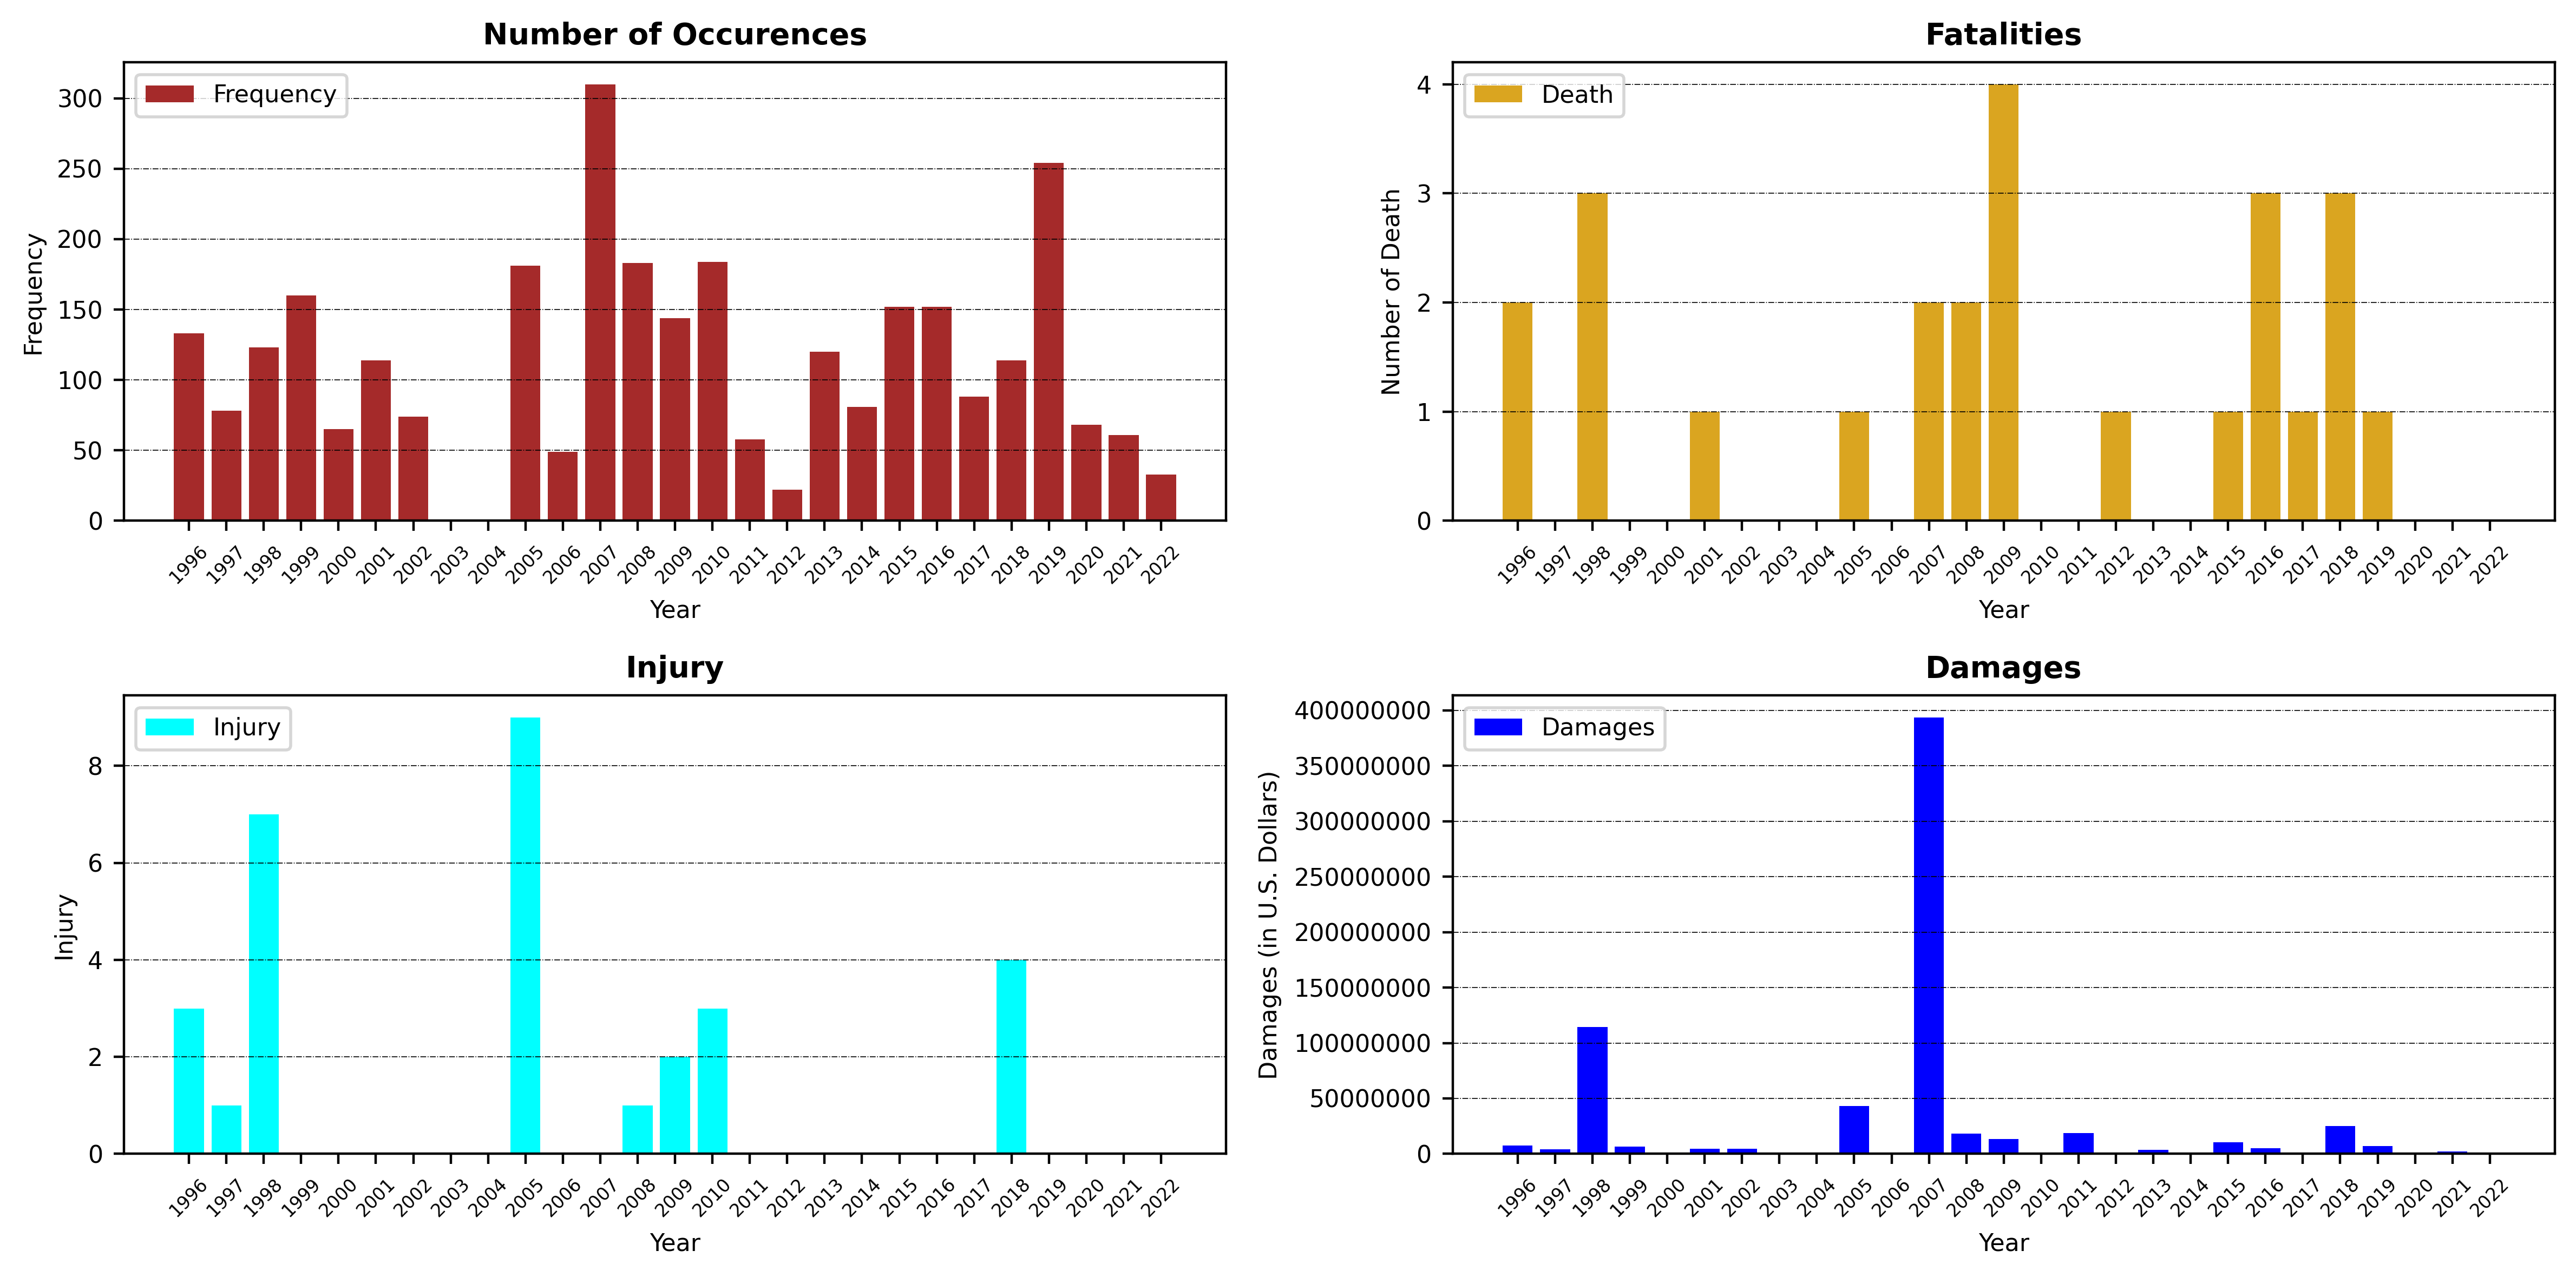

In [39]:
# Function to Process Data by Year and plot
def summaryByYearFlood(input_file, output_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(input_file, low_memory=True)

    # Convert numeric columns to appropriate data types
    numeric_columns = ['Year', 'death', 'sum_injury', 'damage']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

    # Calculate frequency count of unique "Year" values and store it in a new column "Freq_count"
    df['Freq_count'] = df['Year'].map(df['Year'].value_counts())
    
    # Calculate the frequency count of each unique Year
    FreqYear = df.groupby(['Year']).size().reset_index(name='Freq_count')['Freq_count']
    YearStamp = df.groupby('Year')['Year'].first().values
    
    # print(FreqYear.index)
    # print(YearStamp)
    
    # Calculate additional output fields
    deathB = df.groupby('Year')['death'].sum().round()
    sum_injuryB = df.groupby('Year')['sum_injury'].sum()
    damageB = df.groupby('Year')['damage'].sum()
            
    yMax = np.max(damageB) #+ 2500000
    yMin = np.min(damageB) #+ 2500000
    # print("Max", yMax)
    # print("Min", yMin)
    
    

    # Plot each output column against the unique "Year" values
    plt.figure(figsize=(12, 6), dpi=400)
    my_xticks = range(1996, 2023, 1)     
    
    plt.subplot(2, 2, 1)
    # plt.plot(YearStamp, FreqYear.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Frequency peak")
    plt.bar(YearStamp, FreqYear.values, color='brown', label = "Frequency")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Frequency', fontweight='light', fontsize=8)
    plt.title('Number of Occurences', fontweight='bold', fontsize=10)
    plt.legend(loc=2, fontsize=8)
    plt.xticks(range(1996, 2023, 1), visible=True, rotation=45, fontsize=5)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6) 
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    
    
    
    plt.subplot(2, 2, 2)
    # plt.plot(YearStamp, deathB.values.round(), color='black', marker = '.', markersize=0.5, linewidth=1, label = "Death peak")
    plt.bar(YearStamp, deathB.values, color='goldenrod', label = "Death")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Number of Death', fontweight='light', fontsize=8)
    plt.title('Fatalities', fontweight='bold', fontsize=10)
    plt.legend(loc=2, fontsize=8)
    plt.xticks(range(1996, 2023, 1), visible=True, rotation=45, fontsize=5) 
    plt.yticks(range(0, 5, 1), visible=True, fontsize=6)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6) 
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    
    
    plt.subplot(2, 2, 3)
    # plt.plot(YearStamp, sum_injuryB.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Injury peak")
    plt.bar(YearStamp, sum_injuryB.values, color='cyan', label = "Injury")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Injury', fontweight='light', fontsize=8)
    plt.title('Injury', fontweight='bold', fontsize=10)
    plt.legend(loc=2, fontsize=8)
    plt.xticks(range(1996, 2023, 1), visible=True, rotation=45, fontsize=5)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6)  
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    
   

    plt.subplot(2, 2, 4)
    # plt.plot(YearStamp, damageB.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Damage peak")
    plt.bar(YearStamp, damageB.values, color='blue', label = "Damages")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Damages (in U.S. Dollars)', fontweight='light', fontsize=8)
    # plt.ylim((yMin,yMax))
    plt.title('Damages', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=2, fontsize=8)
    plt.xticks(range(1996, 2023, 1), visible=True, rotation=45, fontsize=5)
    # plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
    #             my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    # plt.yticks([])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6)  
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    

    plt.tight_layout()
    # plt.savefig("Plots/Flood.png")
    plt.show()
    

    # Create a new DataFrame for the additional output fields
    output_df = pd.DataFrame({
        'Year': YearStamp,
        'Freq_count': FreqYear.values,
        'damageB': damageB.values,
        'sum_injuryB': sum_injuryB.values,
        'death': deathB.values
    })

    # Save the output DataFrame to a new CSV file
    output_df.to_csv(output_file, index=False)

    # Return the DataFrame with the new columns
    return df

# Process files:
input_file = 'flood_county_date_sorted.csv'  # Input files
output_file = 'flood_data_ByYear.csv'  # Output file
result_df = summaryByYearFlood(input_file, output_file)

# **(4) IceStorm/Blizzard**

# **Level-2&3 Summarize by unique event and county**

In [9]:
# Summarize level-2 data

def advance_summary7(input_file, output_file):
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file, low_memory=False)
    
    # Convert numeric columns to numeric type
    numeric_columns = ['death', 'prop_damage', 'injury']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Group by "county_name" and calculate the maximum magnitude,
    # sum of damage, sum of injury, and frequency count for each unique combination
    summary_df = df.groupby(['county_name']).agg({
         'death': 'sum',
        'prop_damage': 'sum',
        'injury': 'sum'
    }).reset_index()
    
    # Calculate the frequency count of each unique combination
    summary_df['frequency_sort'] = df.groupby(['county_name']).size().reset_index(name='frequency_count')['frequency_count']
    
    # Write the summary DataFrame to a new CSV file
    summary_df.to_csv(output_file, index=False)

# Write Output
input_file = 'blizzard_1950_2023.csv'
output_file = 'blizzard_county_sortL2.csv'
advance_summary7(input_file, output_file)

# **Level-4 Summarize by year (Ice Storm)** 

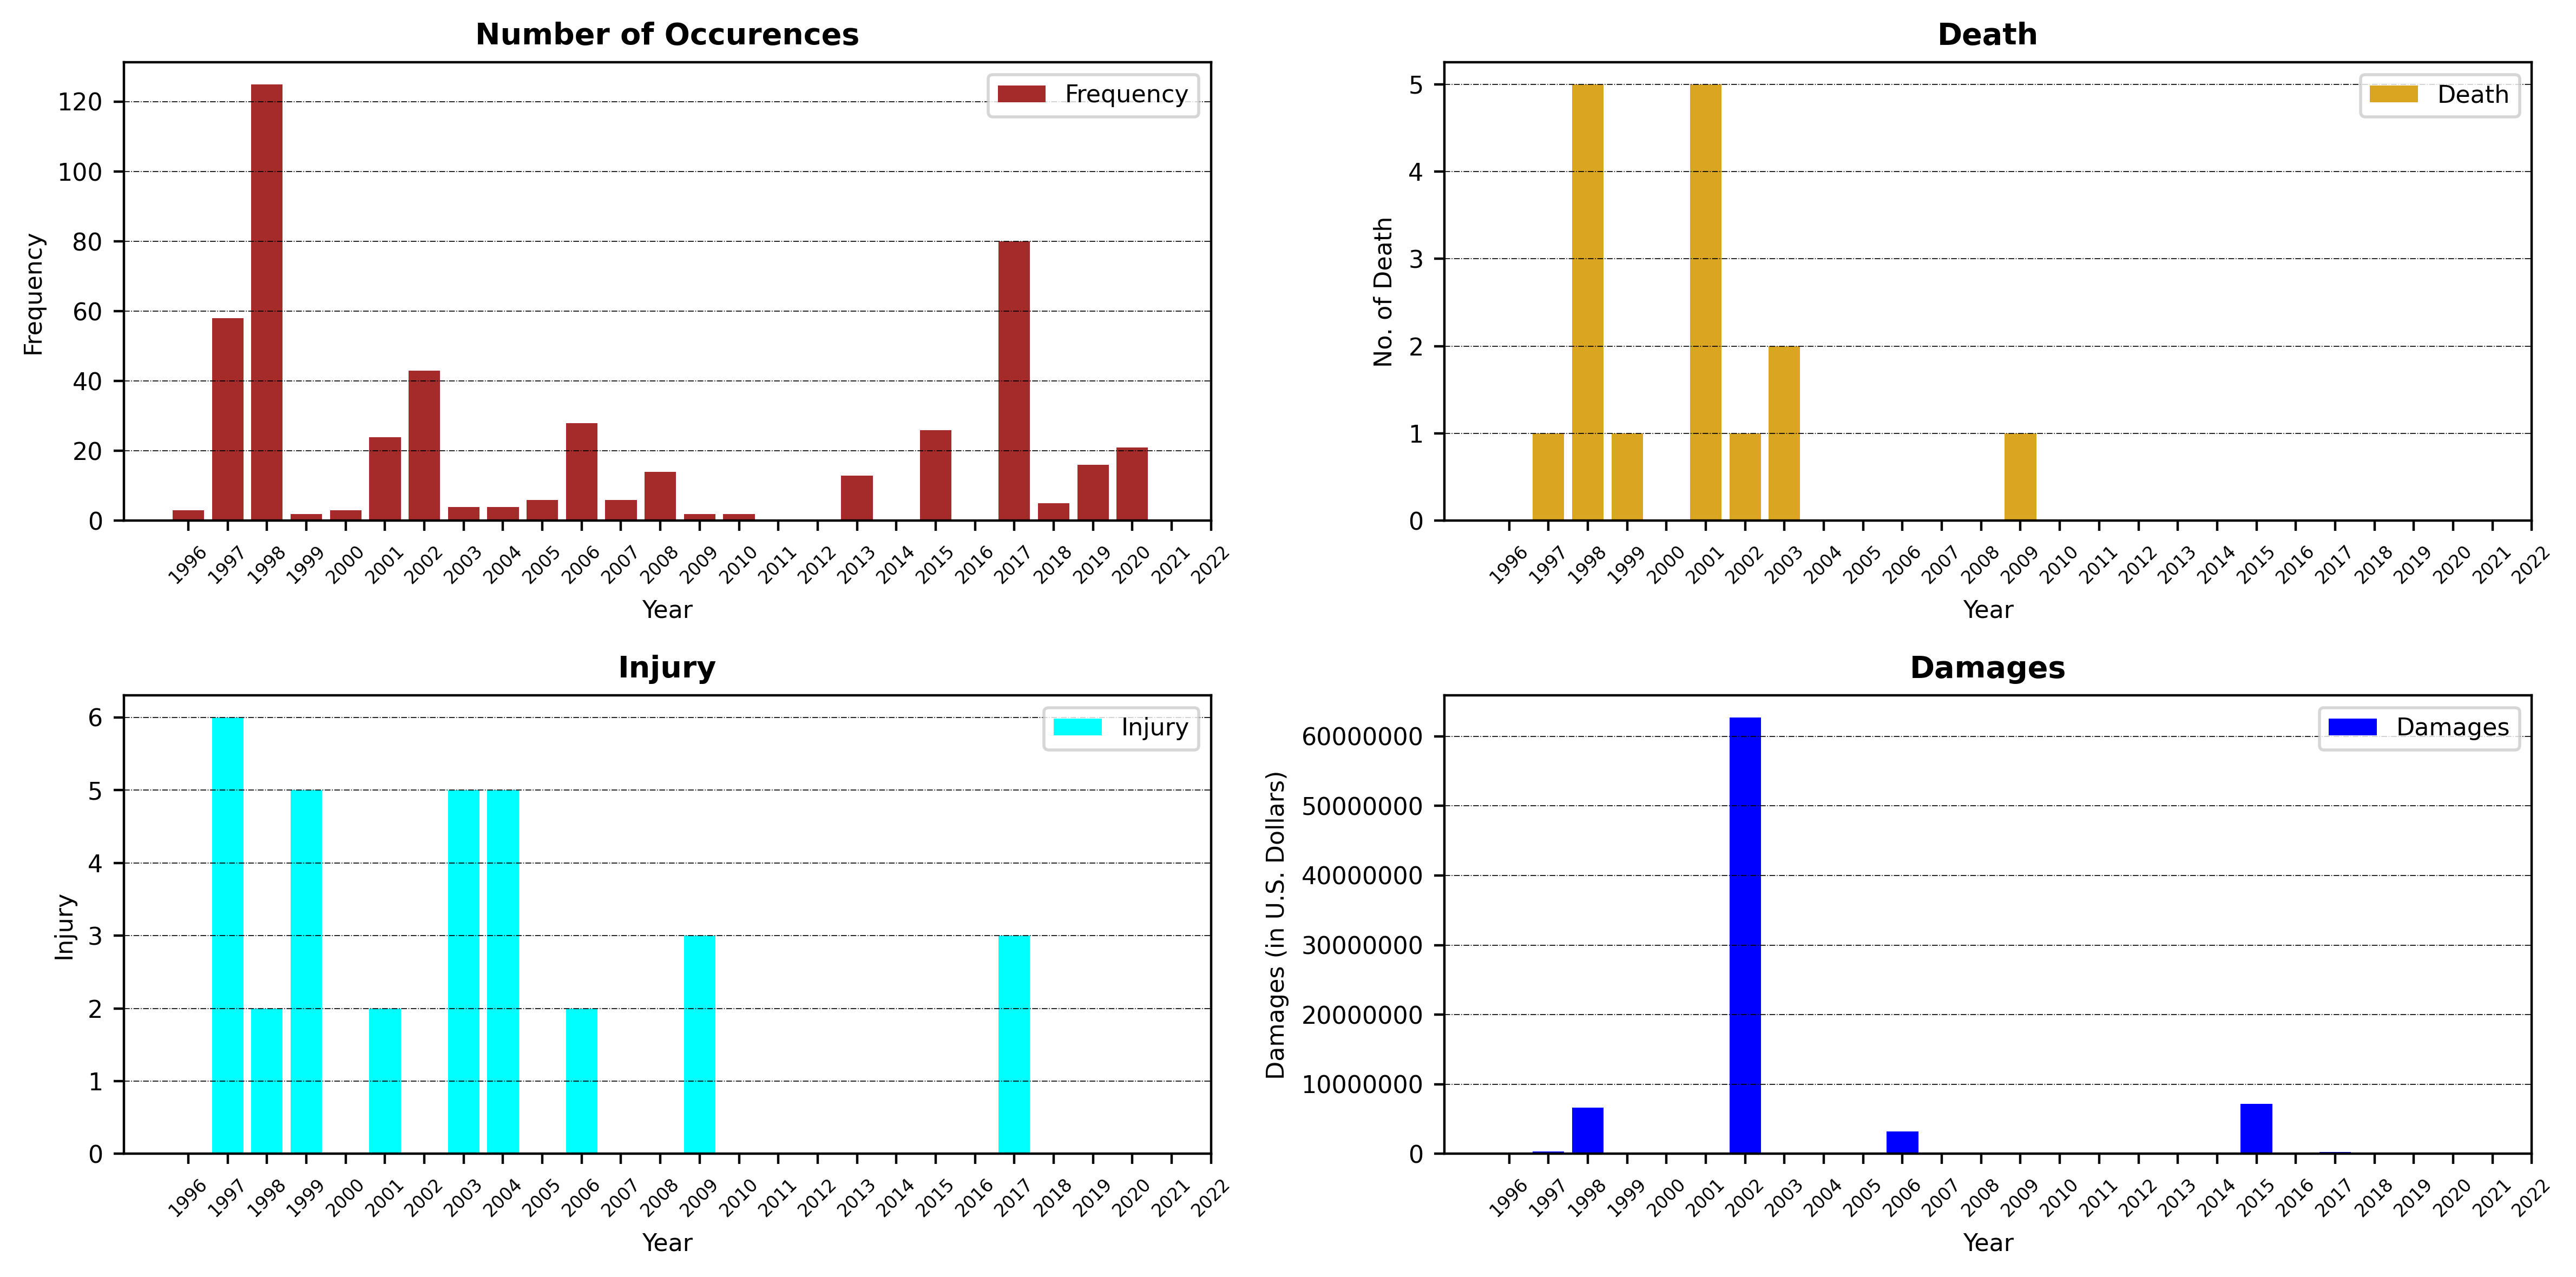

In [41]:
# Function to Process Data by Year and plot
def summaryByYearIceStorm(input_file, output_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(input_file, low_memory=True)

    # Convert numeric columns to appropriate data types
    numeric_columns = ['Year', 'death', 'sum_injury', 'damage']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

    # Calculate frequency count of unique "Year" values and store it in a new column "Freq_count"
    df['Freq_count'] = df['Year'].map(df['Year'].value_counts())
    
    # Calculate the frequency count of each unique Year
    FreqYear = df.groupby(['Year']).size().reset_index(name='Freq_count')['Freq_count']
    YearStamp = df.groupby('Year')['Year'].first().values
    
    # print(FreqYear.index)
    # print(YearStamp)
    
    # Calculate additional output fields
    deathB = df.groupby('Year')['death'].sum().round()
    sum_injuryB = df.groupby('Year')['sum_injury'].sum()
    damageB = df.groupby('Year')['damage'].sum()
            
    yMax = np.max(damageB) #+ 2500000
    yMin = np.min(damageB) #+ 2500000
    # print("Max", yMax)
    # print("Min", yMin)
    
    

    # Plot each output column against the unique "Year" values
    plt.figure(figsize=(12, 6), dpi=400)
    my_xticks = range(1996, 2023, 1)     
    
    plt.subplot(2, 2, 1)
    # plt.plot(YearStamp, FreqYear.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Frequency peak")
    plt.bar(YearStamp, FreqYear.values, color='brown', label = "Frequency")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Frequency', fontweight='light', fontsize=8)
    plt.title('Number of Occurences', fontweight='bold', fontsize=10)
    plt.legend(loc=1, fontsize=8)
    plt.xticks(range(1996, 2023, 1), visible=True, rotation=45, fontsize=5)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6) 
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    
    
    
    plt.subplot(2, 2, 2)
    # plt.plot(YearStamp, deathB.values.round(), color='black', marker = '.', markersize=0.5, linewidth=1, label = "Death peak")
    plt.bar(YearStamp, deathB.values, color='goldenrod', label = "Death")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('No. of Death', fontweight='light', fontsize=8)
    plt.title('Death', fontweight='bold', fontsize=10)
    plt.legend(loc=1, fontsize=8)
    plt.xticks(range(1996, 2023, 1), visible=True, rotation=45, fontsize=5) 
    # plt.yticks(range(0, 5, 1), visible=True, fontsize=6)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6) 
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    
    
    plt.subplot(2, 2, 3)
    # plt.plot(YearStamp, sum_injuryB.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Injury peak")
    plt.bar(YearStamp, sum_injuryB.values, color='cyan', label = "Injury")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Injury', fontweight='light', fontsize=8)
    plt.title('Injury', fontweight='bold', fontsize=10)
    plt.legend(loc=1, fontsize=8)
    plt.xticks(range(1996, 2023, 1), visible=True, rotation=45, fontsize=5)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6)  
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    
   

    plt.subplot(2, 2, 4)
    # plt.plot(YearStamp, damageB.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Damage peak")
    plt.bar(YearStamp, damageB.values, color='blue', label = "Damages")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Damages (in U.S. Dollars)', fontweight='light', fontsize=8)
    # plt.ylim((yMin,yMax))
    plt.title('Damages', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=1, fontsize=8)
    plt.xticks(range(1996, 2023, 1), visible=True, rotation=45, fontsize=5)
    # plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
    #             my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    # plt.yticks([])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6)  
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    

    plt.tight_layout()
    # plt.savefig("Plots/IceStorm.png")
    plt.show()
    

    # Create a new DataFrame for the additional output fields
    output_df = pd.DataFrame({
        'Year': YearStamp,
        'Freq_count': FreqYear.values,
        'damageB': damageB.values,
        'sum_injuryB': sum_injuryB.values,
        'death': deathB.values
    })

    # Save the output DataFrame to a new CSV file
    output_df.to_csv(output_file, index=False)

    # Return the DataFrame with the new columns
    return df

# Process files:
input_file = 'icestorm_county_date_sorted.csv'  # Input files
output_file = 'icestorm_data_ByYear.csv'  # Output file
result_df = summaryByYearIceStorm(input_file, output_file)

# **Level-4 Summarize by year (Blizzard)**

In [44]:
# Function to Process Data by Year and plot
def summaryByYearBlizzard(input_file, output_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(input_file, low_memory=True)

    # Convert numeric columns to appropriate data types
    numeric_columns = ['Year', 'death', 'sum_injury', 'damage']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

    # Calculate frequency count of unique "Year" values and store it in a new column "Freq_count"
    df['Freq_count'] = df['Year'].map(df['Year'].value_counts())
    
    # Calculate the frequency count of each unique Year
    FreqYear = df.groupby(['Year']).size().reset_index(name='Freq_count')['Freq_count']
    YearStamp = df.groupby('Year')['Year'].first().values
    
    # print(FreqYear.index)
    # print(YearStamp)
    
    # Calculate additional output fields
    deathB = df.groupby('Year')['death'].sum().round()
    sum_injuryB = df.groupby('Year')['sum_injury'].sum()
    damageB = df.groupby('Year')['damage'].sum()
            
    yMax = np.max(damageB) #+ 2500000
    yMin = np.min(damageB) #+ 2500000
    # print("Max", yMax)
    # print("Min", yMin)
    
    

    # Plot each output column against the unique "Year" values
    plt.figure(figsize=(12, 6), dpi=400)
    my_xticks = range(1996, 2023, 1)     
    
    plt.subplot(2, 2, 1)
    # plt.plot(YearStamp, FreqYear.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Frequency peak")
    plt.bar(YearStamp, FreqYear.values, color='brown', label = "Frequency")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Frequency', fontweight='light', fontsize=8)
    plt.title('Number of Occurences', fontweight='bold', fontsize=10)
    plt.legend(loc=2, fontsize=8)
    plt.xticks(range(1996, 2023, 1), visible=True, rotation=45, fontsize=5)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6) 
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    
    
    
    plt.subplot(2, 2, 2)
    # plt.plot(YearStamp, deathB.values.round(), color='black', marker = '.', markersize=0.5, linewidth=1, label = "Death peak")
    plt.bar(YearStamp, deathB.values, color='goldenrod', label = "Death")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('No. of Death', fontweight='light', fontsize=8)
    plt.title('Death', fontweight='bold', fontsize=10)
    plt.legend(loc=2, fontsize=8)
    plt.xticks(range(1996, 2023, 1), visible=True, rotation=45, fontsize=5) 
    plt.yticks(range(0, 4, 1), visible=True, fontsize=6)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6) 
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    
    
    plt.subplot(2, 2, 3)
    # plt.plot(YearStamp, sum_injuryB.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Injury peak")
    plt.bar(YearStamp, sum_injuryB.values, color='cyan', label = "Injury")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('No. of Injury', fontweight='light', fontsize=8)
    plt.title('Injury', fontweight='bold', fontsize=10)
    plt.legend(loc=1, fontsize=8)
    plt.xticks(range(1996, 2023, 1), visible=True, rotation=45, fontsize=5)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6)  
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    
   

    plt.subplot(2, 2, 4)
    # plt.plot(YearStamp, damageB.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Damage peak")
    plt.bar(YearStamp, damageB.values, color='blue', label = "Damages")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Property Damage (in U.S. Dollars)', fontweight='light', fontsize=8)
    # plt.ylim((yMin,yMax))
    plt.title('Damages', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=1, fontsize=8)
    plt.xticks(range(1996, 2023, 1), visible=True, rotation=45, fontsize=5)
    # plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
    #             my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    # plt.yticks([])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6)  
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    

    plt.tight_layout()
    # plt.savefig("Plots/Blizzard.png")
    plt.show()
    

    # Create a new DataFrame for the additional output fields
    output_df = pd.DataFrame({
        'Year': YearStamp,
        'Freq_count': FreqYear.values,
        'Prop_damageB': damageB.values,
        'sum_injuryB': sum_injuryB.values,
        'death': deathB.values
    })

    # Save the output DataFrame to a new CSV file
    output_df.to_csv(output_file, index=False)

    # Return the DataFrame with the new columns
    return df

# Process files:
input_file = 'blizzard_county_date_sorted.csv'  # Input files
output_file = 'blizzard_data_ByYear.csv'  # Output file
result_df = summaryByYearBlizzard(input_file, output_file)

# **(5) Wildfire**

# **Level-2&3 Summarize by unique event and county**

In [10]:
# Summarize level-2 data

def advance_summary8(input_file, output_file):
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file, low_memory=False)
    
    # Convert numeric columns to numeric type
    numeric_columns = ['death', 'injury', 'prop_damage', 'crop_damage','sum_damage']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Group by "county_name" and calculate the maximum magnitude,
    # sum of damage, sum of injury, and frequency count for each unique combination
    summary_df = df.groupby(['county_name']).agg({
         'death': 'sum',
        'injury': 'sum',
        'prop_damage': 'sum',
        'crop_damage': 'sum',
        'sum_damage': 'sum'
    }).reset_index()
    
    # Calculate the frequency count of each unique county
    summary_df['frequency_sort'] = df.groupby(['county_name']).size().reset_index(name='frequency_count')['frequency_count']
    
    # Write the summary DataFrame to a new CSV file
    summary_df.to_csv(output_file, index=False)

# Write Output
input_file = 'wildfire_1950_2023.csv'
output_file = 'wildfire_county_sortL2.csv'
advance_summary8(input_file, output_file)

# **Level-4 Summarize by year**

In [47]:
# Function to Process Data by Year and plot
def summaryByYearWildfire(input_file, output_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(input_file, low_memory=True)

    # Convert numeric columns to appropriate data types
    numeric_columns = ['Year', 'death', 'sum_injury', 'damage', 'prop_damage', 'crop_damage']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

    # Calculate frequency count of unique "Year" values and store it in a new column "Freq_count"
    df['Freq_count'] = df['Year'].map(df['Year'].value_counts())
    
    # Calculate the frequency count of each unique Year
    FreqYear = df.groupby(['Year']).size().reset_index(name='Freq_count')['Freq_count']
    YearStamp = df.groupby('Year')['Year'].first().values
    
    # print(FreqYear.index)
    # print(YearStamp)
    
    # Calculate additional output fields
    deathB = df.groupby('Year')['death'].sum().round()
    sum_injuryB = df.groupby('Year')['sum_injury'].sum()
    prop_damageB = df.groupby('Year')['prop_damage'].sum()
    crop_damageB = df.groupby('Year')['crop_damage'].sum()
    sum_damageB = df.groupby('Year')['damage'].sum()
            
    yMax = np.max(sum_damageB) #+ 2500000
    yMin = np.min(sum_damageB) #+ 2500000
    # print("Max", yMax)
    # print("Min", yMin)
    
    

    # Plot each output column against the unique "Year" values
    plt.figure(figsize=(12, 6), dpi=400)
    my_xticks = range(1996, 2023, 1)     
    
    plt.subplot(2, 3, 1)
    # plt.plot(YearStamp, FreqYear.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Frequency peak")
    plt.bar(YearStamp, FreqYear.values, color='brown', label = "Frequency")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Frequency', fontweight='light', fontsize=8)
    plt.title('Number of Occurences', fontweight='bold', fontsize=10)
    plt.legend(loc=2, fontsize=8)
    plt.xticks(range(1996, 2023, 2), visible=True, rotation=45, fontsize=5)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6) 
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    
    
    
    plt.subplot(2, 3, 2)
    # plt.plot(YearStamp, deathB.values.round(), color='black', marker = '.', markersize=0.5, linewidth=1, label = "Death peak")
    plt.bar(YearStamp, deathB.values, color='goldenrod', label = "Death")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Number of Death', fontweight='light', fontsize=8)
    plt.title('Death', fontweight='bold', fontsize=10)
    plt.legend(loc=2, fontsize=8)
    plt.xticks(range(1996, 2023, 2), visible=True, rotation=45, fontsize=5) 
    plt.yticks(range(0, 4, 1), visible=True, fontsize=6)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6) 
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    
    
    plt.subplot(2, 3, 3)
    # plt.plot(YearStamp, sum_injuryB.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Injury peak")
    plt.bar(YearStamp, sum_injuryB.values, color='cyan', label = "Injury")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Injury', fontweight='light', fontsize=8)
    plt.title('Injury', fontweight='bold', fontsize=10)
    plt.legend(loc=1, fontsize=8)
    plt.xticks(range(1996, 2023, 2), visible=True, rotation=45, fontsize=5)
    plt.yticks(range(0, 4, 1), visible=True, fontsize=6)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6)  
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    
    
    plt.subplot(2, 3, 4)
    # plt.plot(YearStamp, damageB.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Damage peak")
    plt.bar(YearStamp, sum_damageB.values, color='blue', label = "Total Damages")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Damage (in U.S. Dollars)', fontweight='light', fontsize=8)
    # plt.ylim((yMin,yMax))
    plt.title('Total Damages', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=2, fontsize=8)
    plt.xticks(range(1996, 2023, 2), visible=True, rotation=45, fontsize=5)
    # plt.yticks([])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6)  
    # plt.grid(axis = 'y')  
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
   

    plt.subplot(2, 3, 5)
    # plt.plot(YearStamp, damageB.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Damage peak")
    plt.bar(YearStamp, prop_damageB.values, color='blue', label = "Property Damage")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    # plt.ylabel('Damage (in U.S. Dollars)', fontweight='light', fontsize=8)
    # plt.ylim((yMin,yMax))
    plt.title('Property Damages', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=2, fontsize=8)
    plt.xticks(range(1996, 2023, 2), visible=True, rotation=45, fontsize=5)
    # plt.yticks([])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6)  
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    
    
    plt.subplot(2, 3, 6)
    # plt.plot(YearStamp, damageB.values, color='black', marker = '.', markersize=0.5, linewidth=1, label = "Damage peak")
    plt.bar(YearStamp, crop_damageB.values, color='blue', label = "Crop Damage")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    # plt.ylabel('Damage (in U.S. Dollars)', fontweight='light', fontsize=8)
    # plt.ylim((yMin,yMax))
    plt.title('Crop Damages', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=2, fontsize=8)
    plt.xticks(range(1996, 2023, 2), visible=True, rotation=45, fontsize=5)
    # plt.yticks([])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='x', which='major', labelsize=6)  
    # plt.grid(axis = 'y')
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='y')
    

    plt.tight_layout()
    # plt.savefig("Plots/Wildfire.png")
    plt.show()
    

    # Create a new DataFrame for the additional output fields
    output_df = pd.DataFrame({
        'Year': YearStamp,
        'Freq_count': FreqYear.values,
        'sum_injuryB': sum_injuryB.values,
        'death': deathB.values,
        'prop_damageB': prop_damageB.values,
        'crop_damageB': crop_damageB.values,
        'sum_damageB': sum_damageB.values
    })

    # Save the output DataFrame to a new CSV file
    output_df.to_csv(output_file, index=False)

    # Return the DataFrame with the new columns
    return df

# Process files:
input_file = 'wildfire_county_date_sorted.csv'  # Input files
output_file = 'wildfire_data_ByYear.csv'  # Output file
result_df = summaryByYearWildfire(input_file, output_file)

# **(6) Tornado**

# **Level-2 Summarize by unique event**

In [7]:
# Function that summerizes the event data records by county name and date, returns frequency count for each unique combination

def county_date_sort9(input_file, output_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file, low_memory=False)
    
    # Convert numeric columns to numeric type
    numeric_columns = ['Year', 'magnitude', 'death', 'injury', 'sum_damage', 'prop_damage', 'crop_damage', 'length', 'width' ]
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Group by "county_name" and "date" and calculate the maximum magnitude,
    # sum of damage, sum of injury, and frequency count for each unique combination
    summary_df = df.groupby(['county_name', 'date']).agg({
         'Year': 'first',
        'magnitude': 'max',
        'death': 'sum',
        'injury': 'sum',
        'sum_damage': 'sum',
        'prop_damage': 'sum',
        'crop_damage': 'sum',
        'length': 'max',
        'width': 'max'
    }).reset_index()
    
    # Calculate the frequency count of each unique combination
    summary_df['frequency_sort'] = df.groupby(['county_name', 'date']).size().reset_index(name='frequency_count')['frequency_count']
    
    # Write the summary DataFrame to a new CSV file
    summary_df.to_csv(output_file, index=False)

# Process Output File
input_file = 'tornado_1950_2023.csv'
output_file = 'tornado_county_date_sortL1.csv'
county_date_sort9(input_file, output_file)

# **Level-3 Summarize by county**

In [8]:
# Summarize level-2 data

def advance_summary10(input_file, output_file):
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file, low_memory=False)
    
    # Convert numeric columns to numeric type
    numeric_columns = ['Year','magnitude', 'death', 'injury', 'sum_damage', 'prop_damage', 'crop_damage', 'length', 'width' ]
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    # Group by "county_name" and calculate the maximum magnitude,
    # sum of damage, sum of injury, and frequency count for each unique combination
    summary_df = df.groupby(['county_name']).agg({
        'Year': 'first',
        'magnitude': 'max',
        'death': 'sum',
        'injury': 'sum',
        'sum_damage': 'sum',
        'prop_damage': 'sum',
        'crop_damage': 'sum',
        'length': 'max',
        'width': 'max'
    }).reset_index()
    
    # Calculate the frequency count of each unique county
    summary_df['frequency_sort'] = df.groupby(['county_name']).size().reset_index(name='frequency_count')['frequency_count']
    
    # Write the summary DataFrame to a new CSV file
    summary_df.to_csv(output_file, index=False)

# Write Output
input_file = 'tornado_county_date_sortL1.csv'
output_file = 'tornado_county_sortL2.csv'
advance_summary10(input_file, output_file)

# **Level-4 Summarize by year**

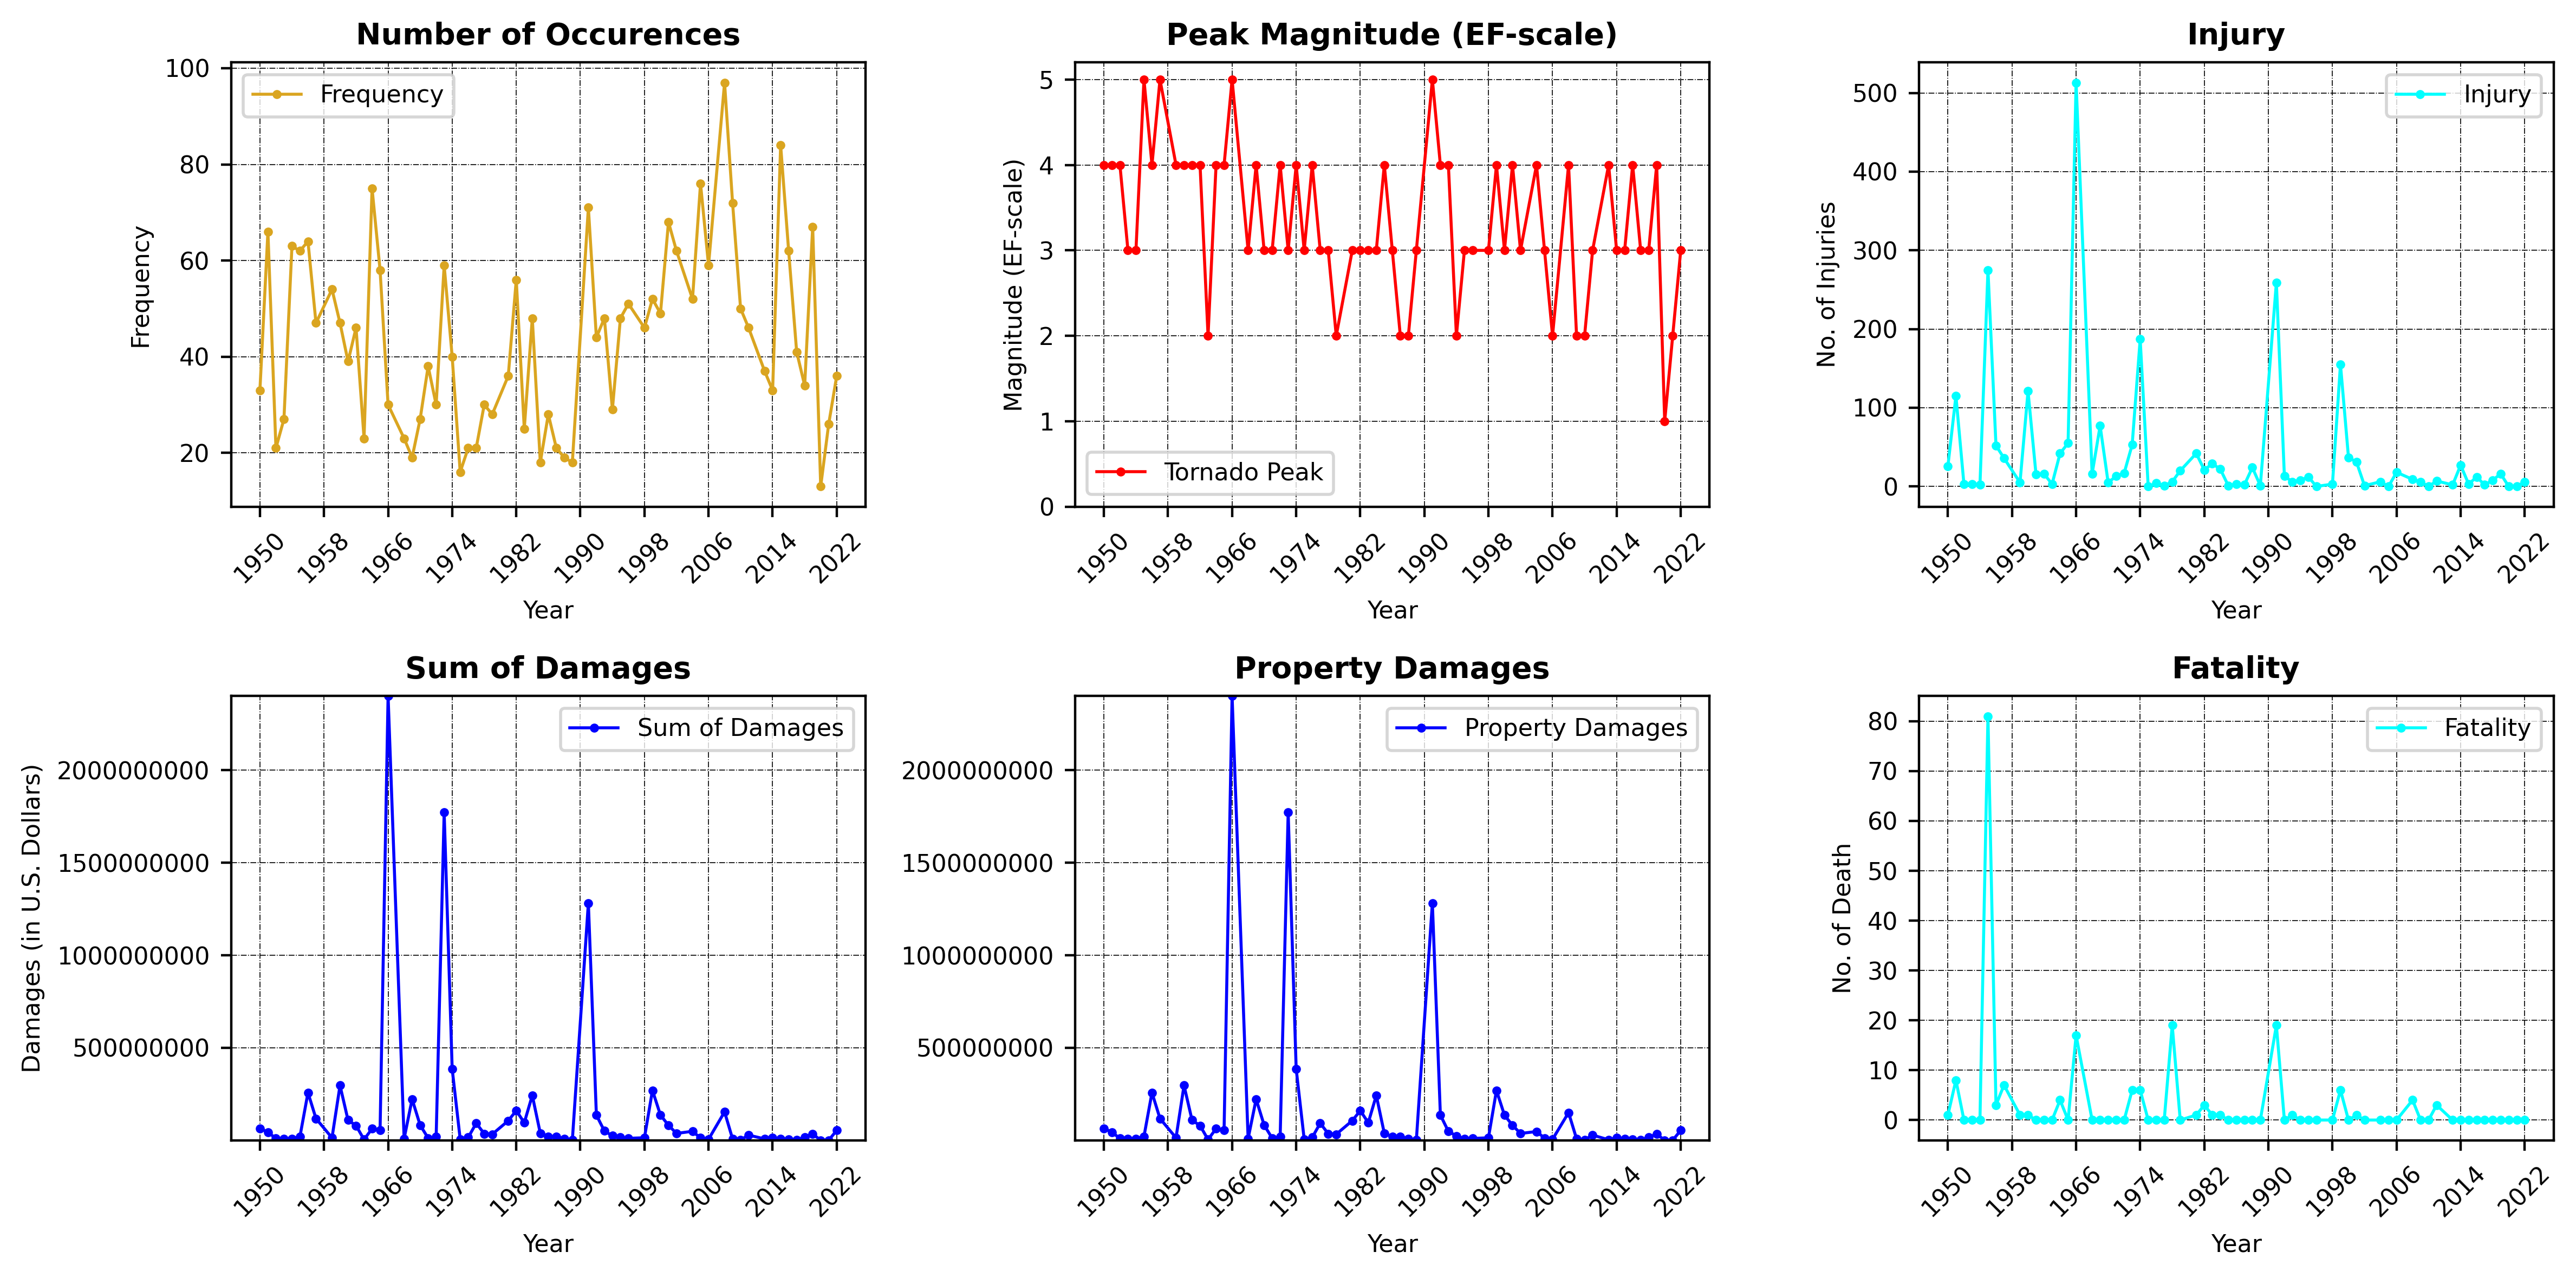

In [53]:
# Function to Process Data by Year and plot
def summaryByYearTornado(input_file, output_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(input_file, low_memory=True)

    # Convert numeric columns to appropriate data types
    numeric_columns = ['Year', 'sum_damage', 'prop_damage', 'crop_damage', 'magnitude', 'injury', 'death']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

    # Calculate frequency count of unique "Year" values and store it in a new column "Freq_count"
    df['Freq_count'] = df['Year'].map(df['Year'].value_counts())
    
    # Calculate the frequency count of each unique Year
    FreqYear = df.groupby(['Year']).size().reset_index(name='Freq_count')['Freq_count']
    YearStamp = df.groupby('Year')['Year'].first().values
    
    # print(FreqYear.index)
    # print(YearStamp)
    
    # Calculate additional output fields
    sum_damageB = df.groupby('Year')['sum_damage'].sum()
    prop_damageB = df.groupby('Year')['prop_damage'].sum()
    crop_damageB = df.groupby('Year')['crop_damage'].sum()
    # magnitude_sumB = df.groupby('Year')['magnitude'].sum()
    magnitude_maxB = df.groupby('Year')['magnitude'].max()
    sum_injuryB = df.groupby('Year')['injury'].sum()
    deathB = df.groupby('Year')['death'].sum()
    
    yMax = np.max(sum_damageB) #+ 2500000
    yMin = np.min(sum_damageB) #+ 2500000
    # print("Max", yMax)
    # print("Min", yMin)
    
    

    # Plot each output column against the unique "Year" values
    plt.figure(figsize=(12, 6), dpi=400)
    my_xticks = range(1950, 2023, 1)     
    
    plt.subplot(2, 3, 1)
    # plt.plot(FreqYear.index, FreqYear.values, color='blue', marker = '.', markersize=0.5, linewidth=0.5, label = "Frequency")
    plt.plot(YearStamp, FreqYear.values, color='goldenrod', marker = '.', markersize=4, linewidth=1, label = "Frequency")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Frequency', fontweight='light', fontsize=8)
    plt.title('Number of Occurences', fontweight='bold', fontsize=10)
    plt.legend(loc=2, fontsize=8)
    # plt.xticks([my_xticks[0],  my_xticks[-1]],  visible=True, rotation=45, fontsize=6)      # plt.xticks(range(1955, 2023, 1), rotation=45, fontsize=6)
    plt.xticks([my_xticks[0], my_xticks[8], my_xticks[16], my_xticks[24], my_xticks[32], my_xticks[40],
                my_xticks[48], my_xticks[56], my_xticks[64], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    
    
    
    plt.subplot(2, 3, 2)
    # plt.bar(magnitude_maxB.index, magnitude_maxB.values)
    plt.plot(YearStamp, magnitude_maxB.values, color='red', marker = '.', markersize=4, linewidth=1, label = "Tornado Peak")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Magnitude (EF-scale)', fontweight='light', fontsize=8)
    plt.title('Peak Magnitude (EF-scale)', fontweight='bold', fontsize=10)
    plt.legend(loc=3, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[8], my_xticks[16], my_xticks[24], my_xticks[32], my_xticks[40],
                my_xticks[48], my_xticks[56], my_xticks[64], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    plt.yticks(range(0, 6, 1), visible=True, fontsize=6)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    
    
    plt.subplot(2, 3, 3)
    # plt.bar(magnitude_sumB.index, magnitude_sumB.values)
    plt.plot(YearStamp, sum_injuryB.values, color='cyan', marker = '.', markersize=4, linewidth=1, label = "Injury")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('No. of Injuries', fontweight='light', fontsize=8)
    plt.title('Injury', fontweight='bold', fontsize=10)
    plt.legend(loc=1, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[8], my_xticks[16], my_xticks[24], my_xticks[32], my_xticks[40],
                my_xticks[48], my_xticks[56], my_xticks[64], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    

    plt.subplot(2, 3, 4)
    # plt.bar(sum_damageB.index, sum_damageB.values)
    plt.plot(YearStamp, sum_damageB.values, color='blue', marker = '.', markersize=4, linewidth=1, label = "Sum of Damages")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('Damages (in U.S. Dollars)', fontweight='light', fontsize=8)
    plt.ylim((yMin,yMax))
    plt.title('Sum of Damages', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=1, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[8], my_xticks[16], my_xticks[24], my_xticks[32], my_xticks[40],
                my_xticks[48], my_xticks[56], my_xticks[64], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    

    plt.subplot(2, 3, 5)
    # plt.bar(prop_damageB.index, prop_damageB.values)
    plt.plot(YearStamp, prop_damageB.values, color='blue', marker = '.', markersize=4, linewidth=1, label = "Property Damages")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    # plt.ylabel('Damages (in U.S. Dollars)', fontweight='light', fontsize=8)
    plt.ylim((yMin,yMax))
    plt.title('Property Damages', fontweight='bold', fontsize=10)
    plt.ticklabel_format(style='plain')
    plt.legend(loc=1, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[8], my_xticks[16], my_xticks[24], my_xticks[32], my_xticks[40],
                my_xticks[48], my_xticks[56], my_xticks[64], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    # plt.yticks([])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')
    

    # plt.subplot(2, 3, 6)
    # # plt.bar(crop_damageB.index, crop_damageB.values)
    # plt.plot(YearStamp, crop_damageB.values, color='blue', marker = '.', markersize=0.5, linewidth=1.5, label = "Crop Damages")
    # plt.xlabel('Year', fontweight='light', fontsize=8)
    # # plt.ylabel('Damages (in U.S. Dollars)', fontweight='light', fontsize=8)
    # plt.ylim((yMin,yMax))
    # plt.title('Crop Damages (in U.S. Dollars)', fontweight='bold', fontsize=10)
    # plt.ticklabel_format(style='plain')
    # plt.legend(loc=1, fontsize=6)
    # plt.xticks([my_xticks[0], my_xticks[9], my_xticks[17], my_xticks[26], my_xticks[34], my_xticks[43],
    #             my_xticks[51], my_xticks[60], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    # # plt.yticks([])
    # plt.tick_params(axis='both', which='major', labelsize=8)
    
    
    
    plt.subplot(2, 3, 6)
    plt.plot(YearStamp, deathB.values, color='cyan', marker = '.', markersize=4, linewidth=1, label = "Fatality")
    plt.xlabel('Year', fontweight='light', fontsize=8)
    plt.ylabel('No. of Death', fontweight='light', fontsize=8)
    plt.title('Fatality', fontweight='bold', fontsize=10)
    plt.legend(loc=1, fontsize=8)
    plt.xticks([my_xticks[0], my_xticks[8], my_xticks[16], my_xticks[24], my_xticks[32], my_xticks[40],
                my_xticks[48], my_xticks[56], my_xticks[64], my_xticks[-1]],  visible=True, rotation=45, fontsize=6) 
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid(True, linestyle='dashdot', linewidth='0.3', color='black', axis='both')


    
    

    plt.tight_layout()
    # plt.savefig("Plots/Tornado.png")
    plt.show()
    

    # Create a new DataFrame for the additional output fields
    output_df = pd.DataFrame({
        'Year': YearStamp,
        'Freq_count': FreqYear.values,
        'sum_damageB': sum_damageB.values,
        'prop_damageB': prop_damageB.values,
        'crop_damageB': crop_damageB.values,
        # 'magnitude_sumB': magnitude_sumB.values,
        'magnitude_maxB': magnitude_maxB.values,
        'injuryB': sum_injuryB.values,
        'death': deathB.values
    })

    # Save the output DataFrame to a new CSV file
    output_df.to_csv(output_file, index=False)

    # Return the DataFrame with the new columns
    return df

# Process files:
input_file = 'tornado_county_date_sortL1.csv'  # Input files
output_file = 'tornado_data_ByYear.csv'  # Output file
result_df = summaryByYearTornado(input_file, output_file)

### **Estra Codes (Tornado Magnitude converter)** 

In [3]:
# Code to scale tornado magnitude by number 
def convert_tor_scale(cell):
    scale_mapping = {
        "EF0": 0,
        "EF1": 1,
        "EF2": 2,
        "EF3": 3,
        "EF4": 4,
        "EF5": 5
    }
    return scale_mapping.get(cell, cell)

def main(input_file, output_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(input_file)

    # Create a new column "TOR_SCALE" and convert "TORB" to corresponding numbers
    df["TOR_SCALE"] = df["TORA"].apply(convert_tor_scale)

    # Save the updated DataFrame to a new CSV file
    df.to_csv(output_file, index=False)

if __name__ == "__main__":
    input_file = "TornadoMag.csv"         # Input file
    output_file = "TornadoMagSorted.csv"  # Output File
    main(input_file, output_file)